In [ ]:
# import torch
# from torchvision import datasets, transforms
# from torch.utils.data import DataLoader
# import matplotlib.pyplot as plt

# # 设置数据预处理（把图像转换为Tensor并归一化）
# transform = transforms.ToTensor()

# # 下载训练集和测试集
# train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
# test_dataset  = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# # 使用 DataLoader 封装数据（用于训练时批量加载）
# train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
# test_loader  = DataLoader(test_dataset, batch_size=64, shuffle=False)


100%|██████████| 9.91M/9.91M [00:03<00:00, 3.28MB/s]
100%|██████████| 28.9k/28.9k [00:01<00:00, 21.1kB/s]
100%|██████████| 1.65M/1.65M [00:02<00:00, 561kB/s] 
100%|██████████| 4.54k/4.54k [00:00<00:00, 1.65MB/s]


# 处理数据集

In [1]:
from torchvision.datasets import MNIST

train_data = MNIST(root='./data', train=True)

images = train_data.data.numpy()      # shape: (60000, 28, 28)，类型 uint8
labels = train_data.targets.numpy()   # shape: (60000,)

print(images.shape, images.dtype)  # (60000, 28, 28), uint8


(60000, 28, 28) uint8


5


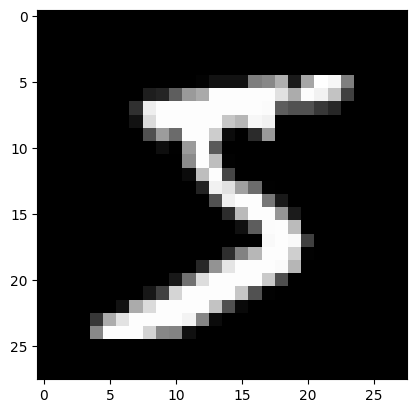

In [2]:
import matplotlib.pyplot as plt

plt.imshow(images[0],cmap='gray')
print(labels[0])
plt.show()

In [3]:
images_flattened = images.reshape(images.shape[0],images.shape[1]*images.shape[2])

In [4]:
test_data = MNIST(root='./data',train=False)
test_imgs = test_data.data.numpy()
test_labels =  test_data.targets.numpy()
test_imgs_flattened = test_imgs.reshape(test_imgs.shape[0],test_imgs.shape[1]*test_imgs.shape[2])

# 神经网络模型

## 训练

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
	Dense(units=25, activation='relu'),# kernel_regularizer=L2(0.01) 正则化
	Dense(units=15, activation='relu'),
	Dense(units=10, activation='linear')
])

from tensorflow.keras.losses import SparseCategoricalCrossentropy

model.compile(loss=SparseCategoricalCrossentropy(from_logits=True)) # optimizer=tf.keras.optimizers.Adam(learining_rate=1e-3) 还能加选择优化方法的参数
model.fit(images_flattened,labels,epochs=15)


Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 691us/step - loss: 2.7724
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 672us/step - loss: 1.5303
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 682us/step - loss: 1.2586
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 670us/step - loss: 1.0901
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 683us/step - loss: 0.9714
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 672us/step - loss: 0.9078
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 691us/step - loss: 0.8352
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 698us/step - loss: 0.6899
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 705us/step - loss: 0.6706
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.6271
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 904us/step - loss: 0.5852
Epoch 12/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 856us/step - loss: 0.5784
Epoch 13/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 849us/step - loss: 0.5564
Epoch 14/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 854us/step - loss: 0.5579
Epo

## 评估

In [12]:
loss = model.evaluate(test_imgs_flattened, test_labels)
print(f"Test loss: {loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step - loss: 0.6254
Test loss: 0.5677


## 预测

In [13]:
logits = model.predict(test_imgs_flattened[0:10])

# 因为最后一层是线性输出 + from_logits=True，所以需要 softmax 再取 argmax
predictions = tf.argmax(tf.nn.softmax(logits), axis=1).numpy()

print("前10个预测类别：", predictions)
print('真实类别: ',test_labels[0:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
前10个预测类别： [7 2 1 0 4 1 4 4 6 9]
真实类别:  [7 2 1 0 4 1 4 9 5 9]


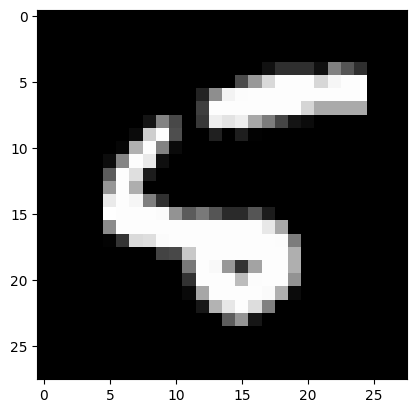

In [16]:
plt.imshow(test_imgs[8],cmap='gray')
plt.show()